# Imports, data loading, and utils

In [1]:
import sys
sys.path.append("..")
import numpy as np
from IPython.display import display, Image
import drawsvg
from utils import load_json, pretty_print_json, draw_task_v2, output_drawing, analyze_task
from copy import deepcopy
import json
main_data_path = '../arc-prize-2024/'

training_challenges  = load_json(main_data_path + 'data/arc-agi_training_challenges.json')
training_solutions  = load_json(main_data_path + 'data/arc-agi_training_solutions.json')
task_ids  = load_json(main_data_path + 'data/task_ids.json')

In [2]:
from utils import store_json, update_task_ids, check_duplicate_transition   

data_path = 'data/t1.json'
figs_path = 'figs/t1/'

In [3]:
def apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path):
    """
    Apply specified transition to task data for given index

    Args:
        index: Task index number
        transition_config: Dictionary specifying transition details, e.g.:
            {
                '0': {
                    'name': 'enlarge',
                    'input': ['grid', '3']
                }
            }
    """
    # Get task data
    id = task_ids[f'{index}']
    task = deepcopy(training_challenges[id])

    duplicate = check_duplicate_transition(data_path, id, transition_config)

    if not duplicate:
        # Create transition function that applies all transformations sequentially
        def transition(grid):
            grid_ = deepcopy(grid)
            # Apply each transformation in order
            for i in range(len(transition_config)):
                # Import required function for this step
                func_name = transition_config[str(i)]['name']
                func = globals()[func_name]

                # Get function arguments from config
                args = [grid_] + [eval(arg) if arg.isdigit() else arg for arg in transition_config[str(i)]['input'][1:]]

                # Apply this transformation
                grid_ = func(*args)
            return grid_

        # Apply transition to train and test data
        for item in task['train']:
            item['output'] = transition(item['input'])
        for item in task['test']:
            item['output'] = transition(item['input'])

        # Store results and create visualization
        store_json(id, index, transition_config, task, data_path)

        drawing = draw_task_v2(task, index, id, include_test=True)
        output_drawing(drawing, f'{figs_path}{index}_{id}.png')

        display(Image(filename=f'{figs_path}{index}_{id}.png'))
    else:
        print(f"Skipping duplicate transition for index {index}")
        display(Image(filename=f'{figs_path}{index}_{id}.png'))

# Index 0 - rotate_grid

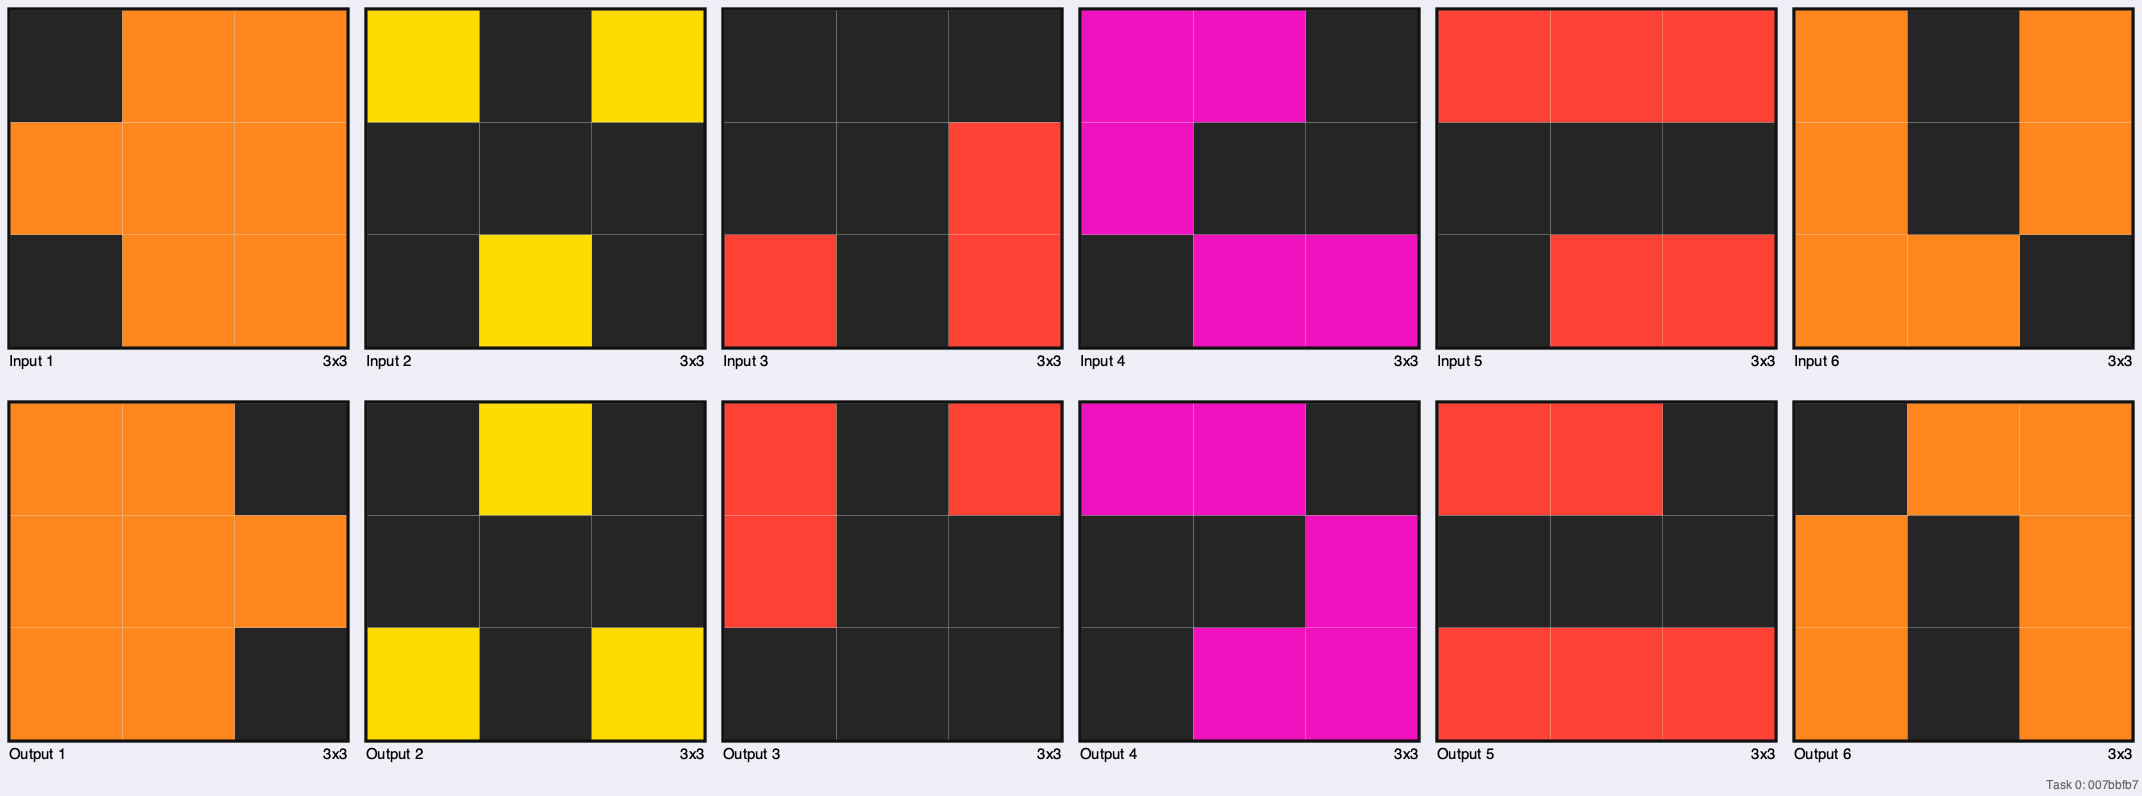

In [4]:
from blocks import rotate_grid

index = 0 

transition_config = {'0': 
        {
            'name': 'rotate_grid', 
            'input': ['grid', '180']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 1 - mirror_grid

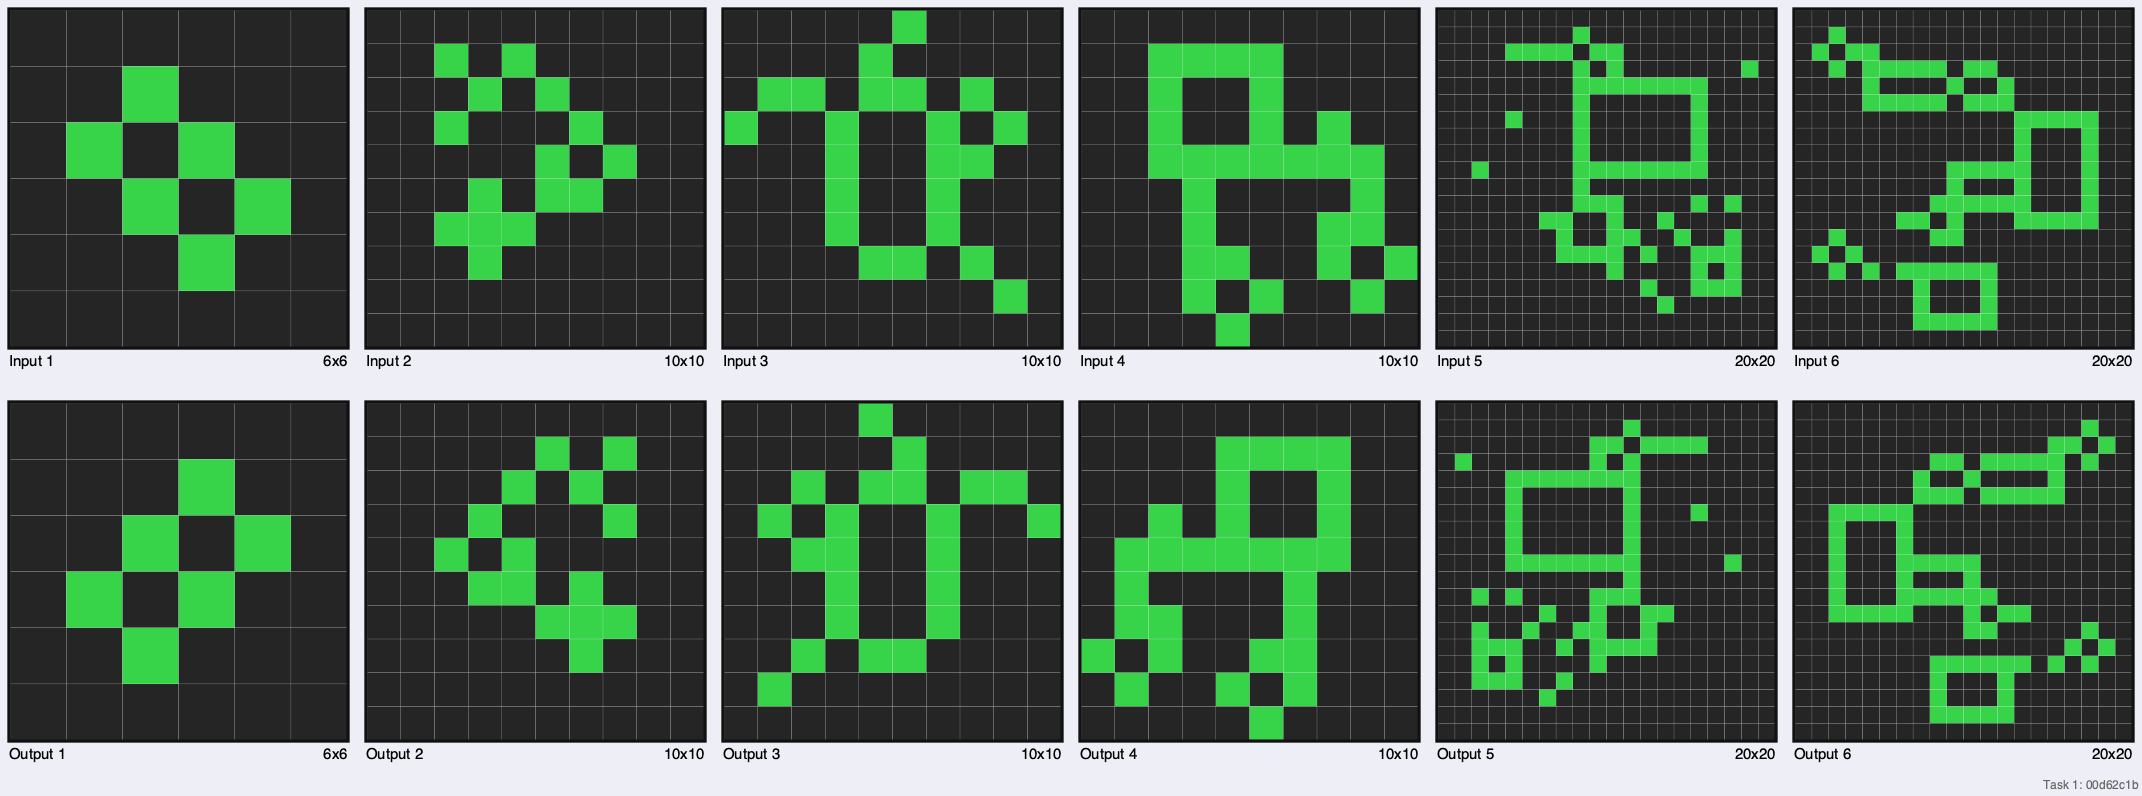

In [5]:
from blocks import mirror_grid

index = 1 

transition_config = {
    '0': 
        {
            'name': 'mirror_grid', 
            'input': ['grid', 'hor']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 2 - shift_grid

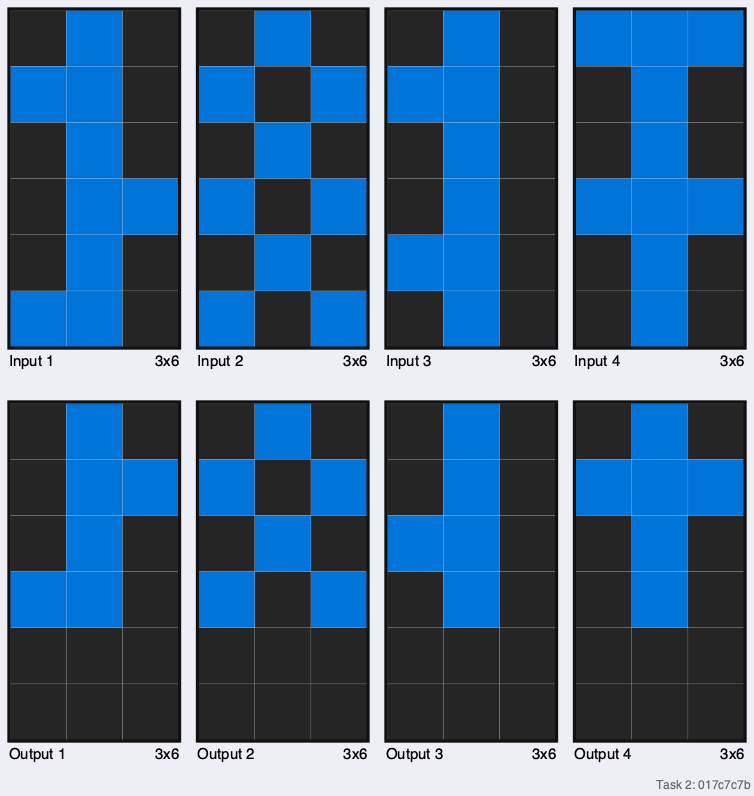

In [6]:
from blocks import shift_grid

index = 2

transition_config = {
    '0': 
        {
            'name': 'shift_grid', 
            'input': ['grid', 'up', '2']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 3 - crop_grid

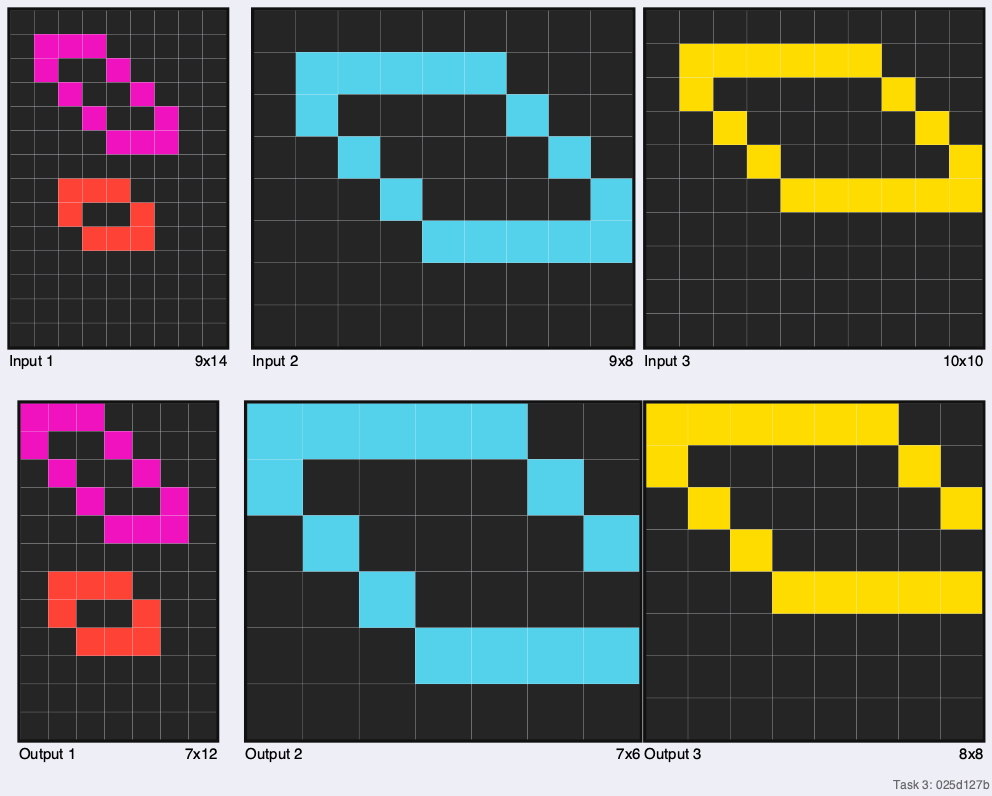

In [8]:
from blocks import crop_grid

index = 3

transition_config = {
    '0': 
        {
            'name': 'crop_grid', 
            'input': ['grid', '1', '1', '1', '1']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 4 - draw_border

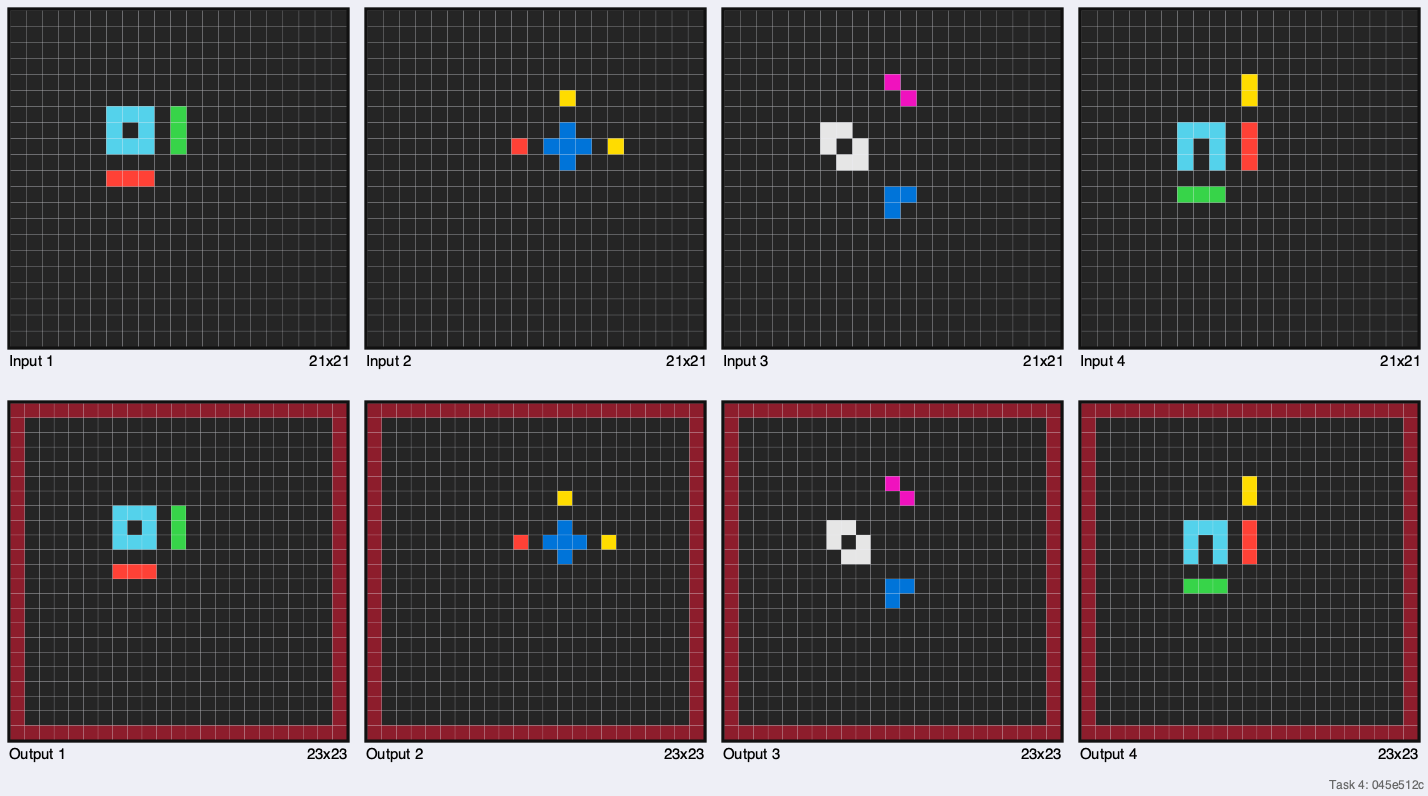

In [9]:
from blocks import draw_border

index = 4

transition_config = {
    '0': 
        {
            'name': 'draw_border', 
            'input': ['grid', '9']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 5 - enlarge

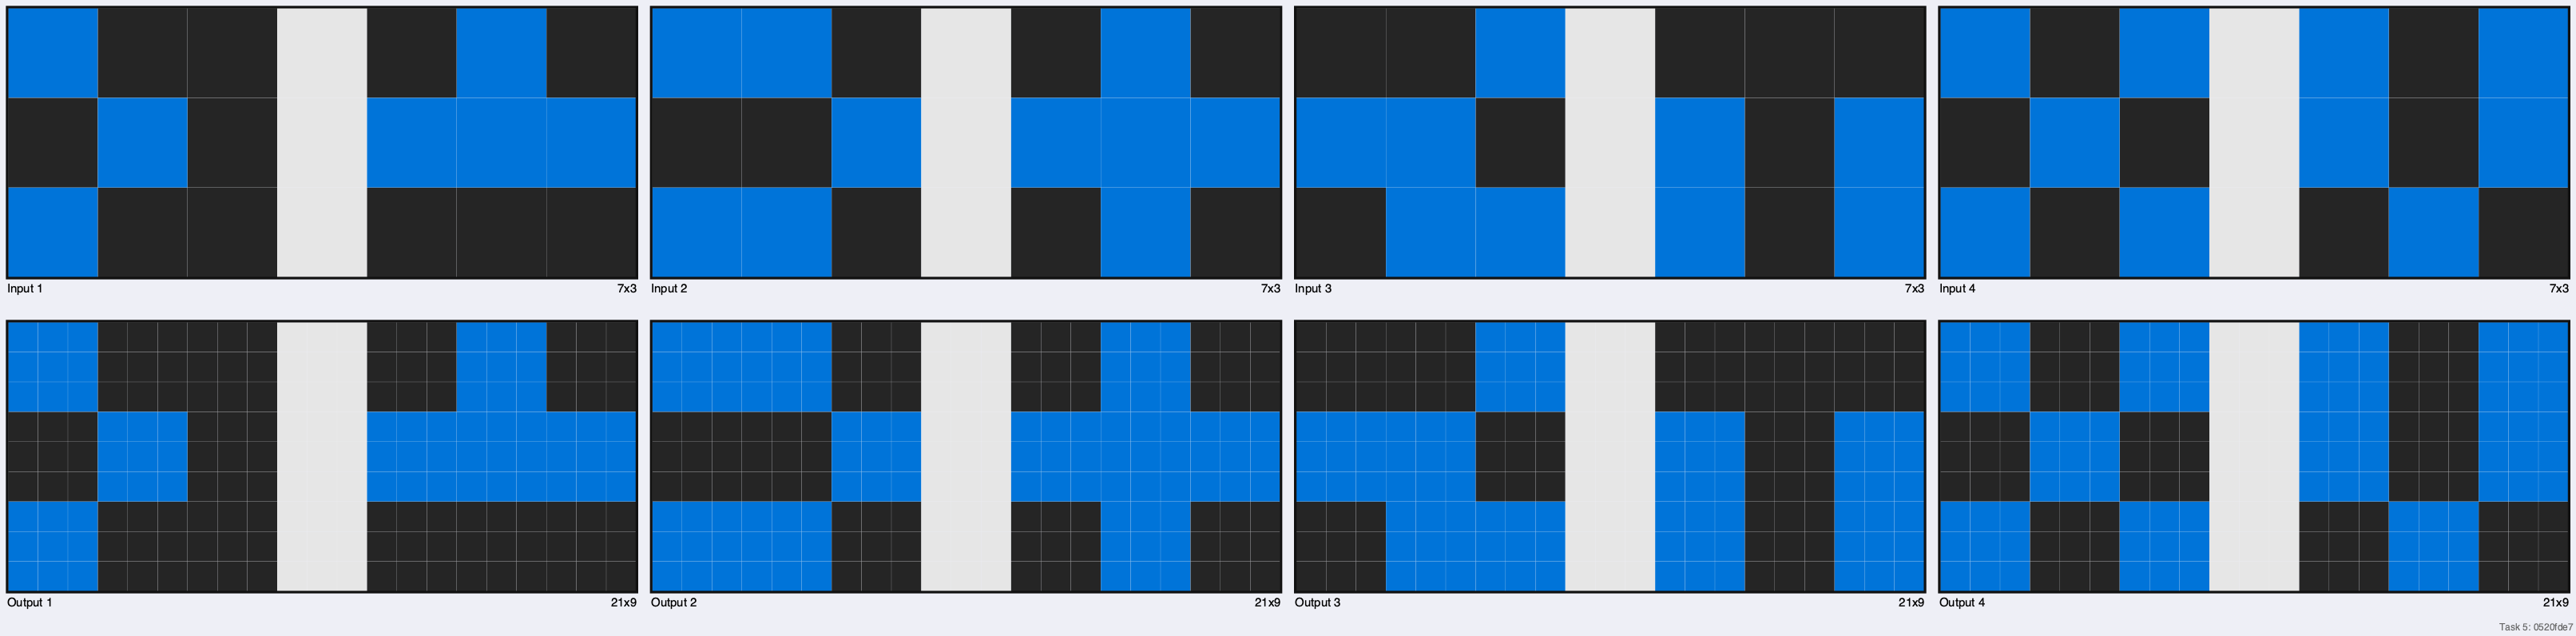

In [10]:
from blocks import enlarge

index = 5

transition_config = {
    '0': 
        {
            'name': 'enlarge', 
            'input': ['grid', '3']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 6 - invert_colors

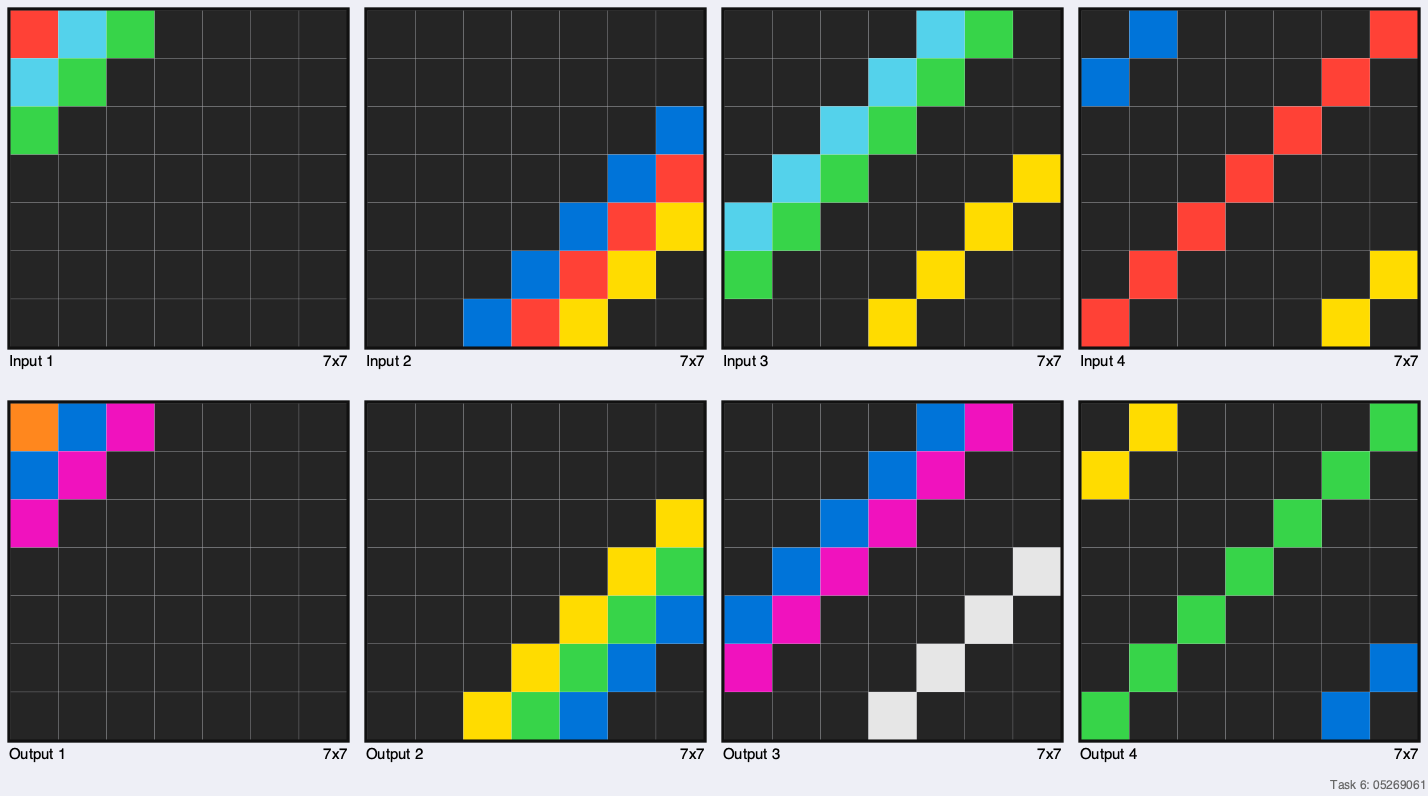

In [11]:
from blocks import invert_colors

index = 6

transition_config = {
    '0': 
        {
            'name': 'invert_colors', 
            'input': ['grid']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 7 - threshold


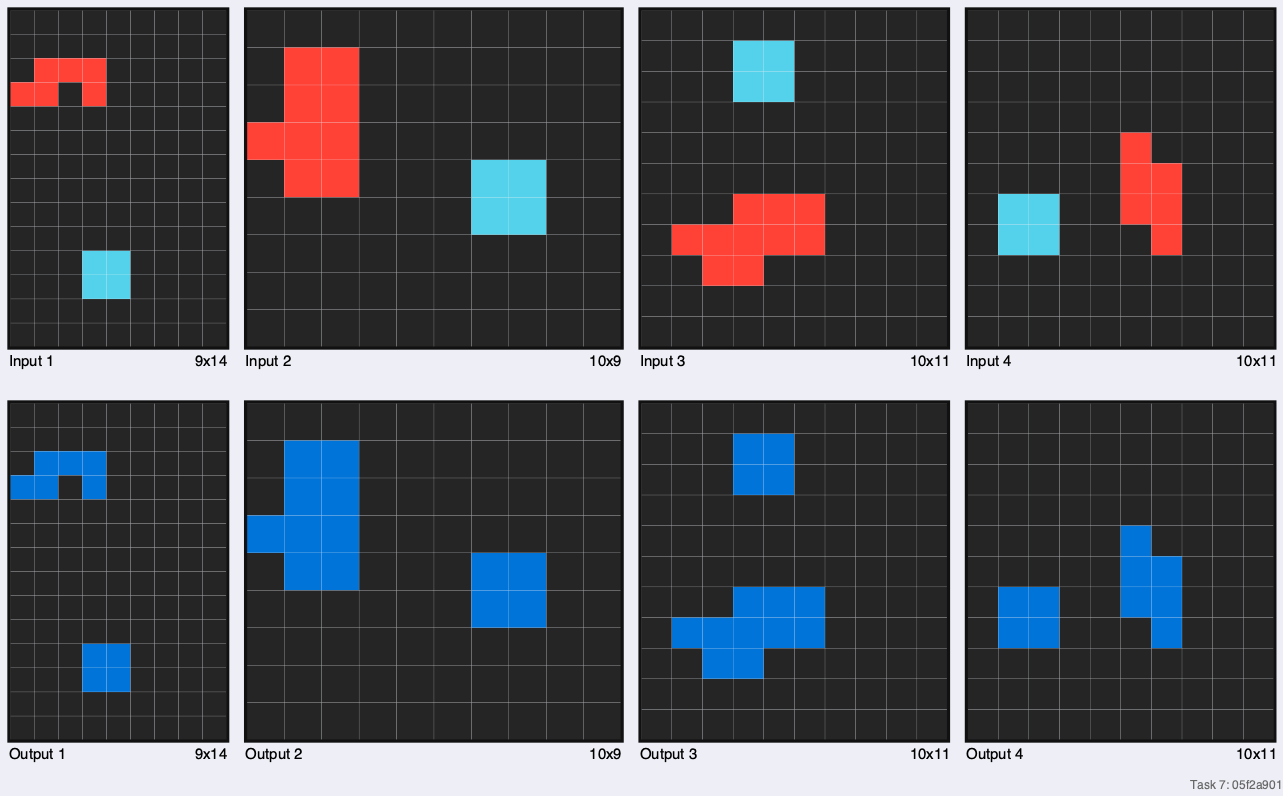

In [13]:
from blocks import threshold

index = 7

transition_config = {
    '0': 
        {
            'name': 'threshold', 
            'input': ['grid']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 9 - detect_edges

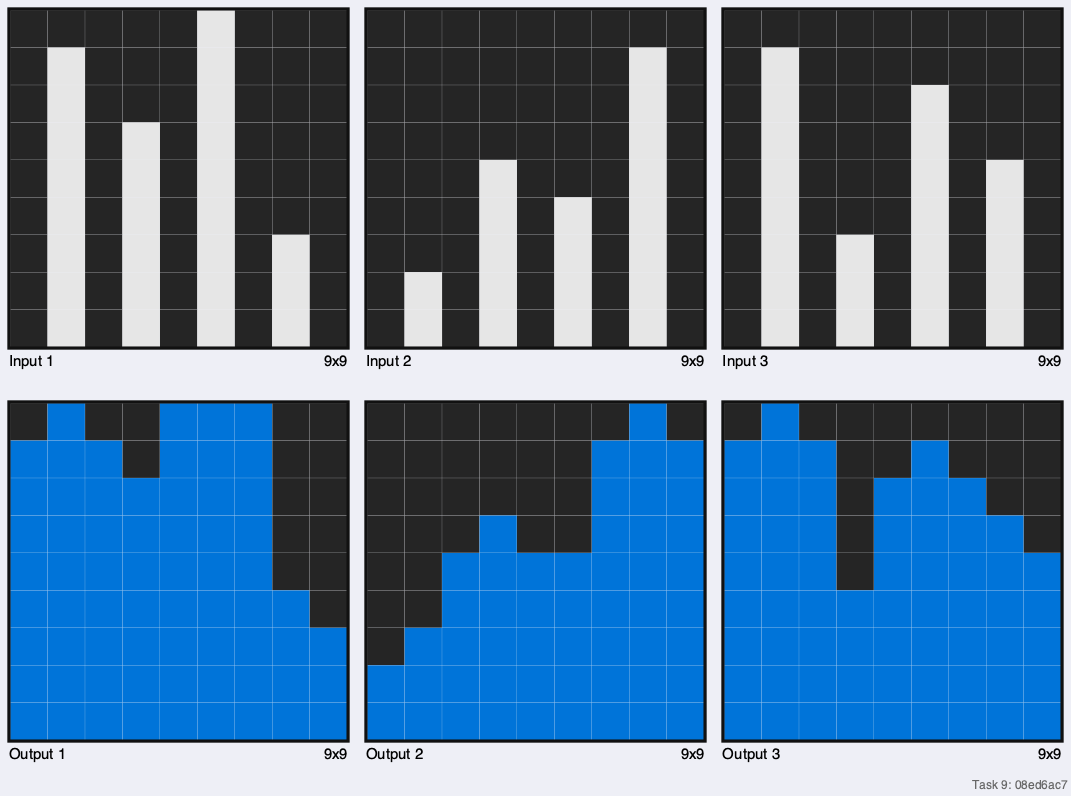

In [14]:
from blocks import detect_edges

index = 9

transition_config = {
    '0': 
        {
            'name': 'detect_edges', 
            'input': ['grid']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 10 - blur

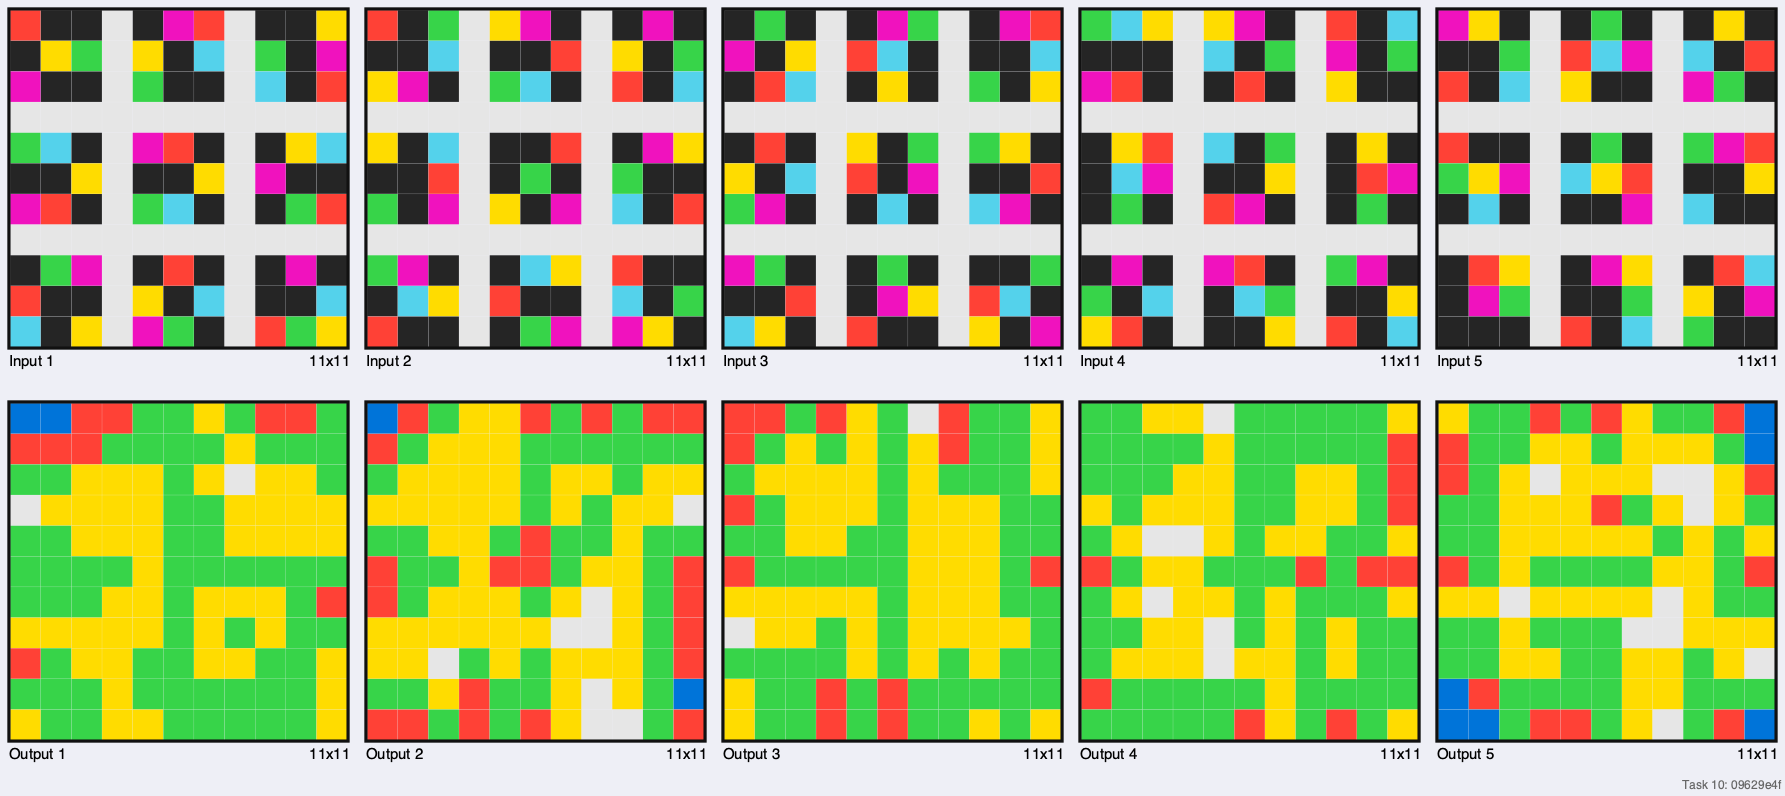

In [15]:
from blocks import blur

index = 10

transition_config = {
    '0': 
        {
            'name': 'blur', 
            'input': ['grid']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 11 - sharpen

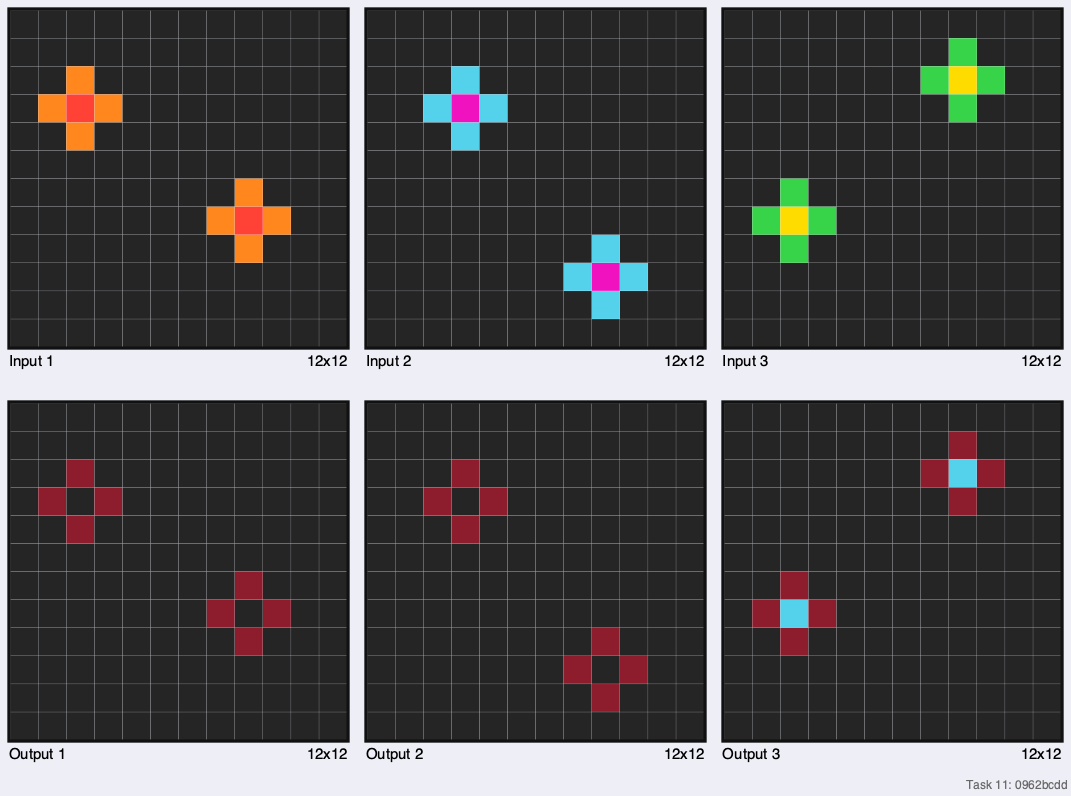

In [16]:
from blocks import sharpen

index = 11

transition_config = {
    '0': 
        {
            'name': 'sharpen', 
            'input': ['grid']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)

# Index 13 - add_noise

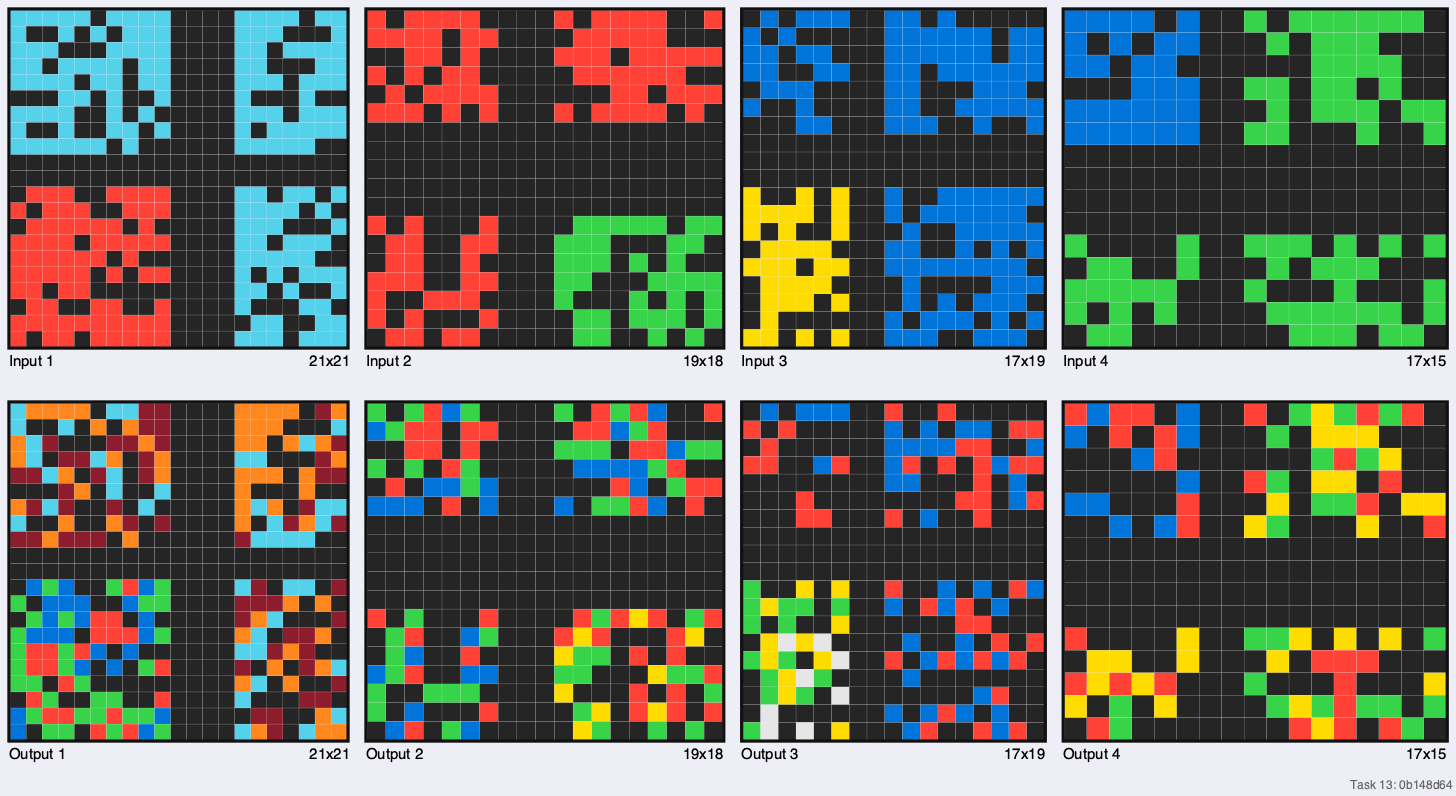

In [17]:
from blocks import add_noise

index = 13

transition_config = {
    '0': 
        {
            'name': 'add_noise', 
            'input': ['grid']
        },
}

apply_transition(task_ids, index, training_challenges, transition_config, data_path, figs_path)